## SC4061 Assignment 1

### 2.1 Contrast Stretching

#### Part a & b: Load Image, Convert to Greyscale & Display Image

Grayscale Image shape: (320, 443), Data type: uint8


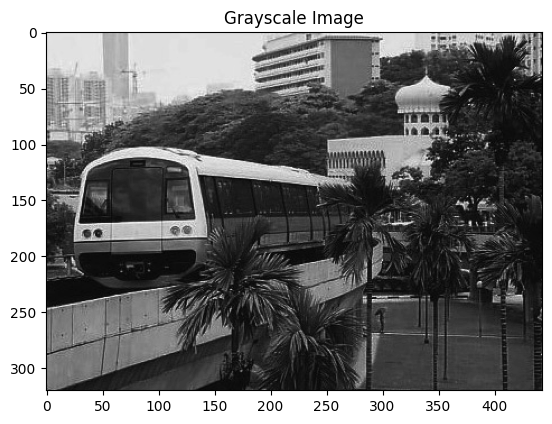

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (assuming it's in the same folder as your script)
Pc = cv2.imread('mrt-train.jpg')

# Convert the image to grayscale
P = cv2.cvtColor(Pc, cv2.COLOR_BGR2GRAY)

# Display the shape and data type of the grayscale image
print(f"Grayscale Image shape: {P.shape}, Data type: {P.dtype}")

# Display the grayscale image
plt.imshow(P, cmap='gray')
plt.title('Grayscale Image')
plt.show()

#### Part c: Check for Minimum and Maximum Intensities

In [18]:
# Part c: Check the minimum and maximum intensities
min_val = np.min(P)
max_val = np.max(P)
print(f"Min intensity: {min_val}, Max intensity: {max_val}")


Min intensity: 13, Max intensity: 204


#### Part d: Perform Contrast Stretching (Two Lines)

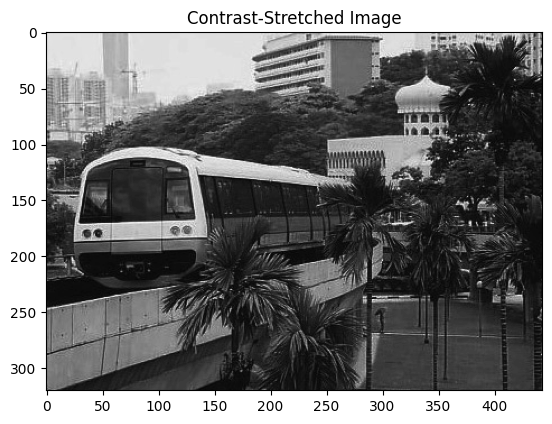

In [20]:
# Part d: Perform dynamic contrast stretching
P2 = (P - np.min(P)) * (255.0 / (np.max(P) - np.min(P)))  # Stretch the contrast
P2 = P2.astype(np.uint8)  # Convert the result back to uint8 for proper display

# Display the contrast-stretched image
plt.imshow(P2, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.show()


#### Part e: Redisplay the Image with Correct Display Handling

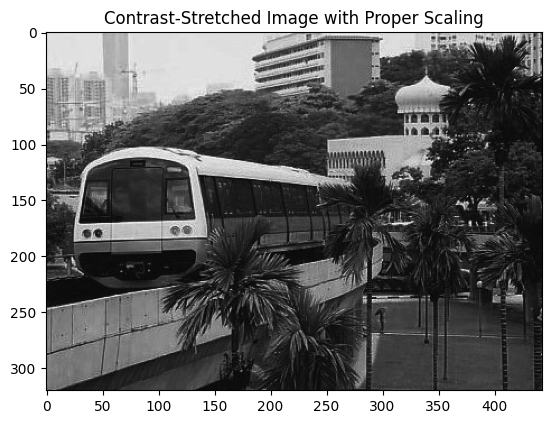

In [21]:
# Part e: Redisplay the contrast-stretched image with automatic scaling
plt.imshow(P2, cmap='gray', vmin=0, vmax=255)  # vmin and vmax ensure proper scaling
plt.title('Contrast-Stretched Image with Proper Scaling')
plt.show()

In [23]:
print(f"Original grayscale image min: {np.min(P)}, max: {np.max(P)}")
print(f"Contrast-stretched image min: {np.min(P2)}, max: {np.max(P2)}")

Original grayscale image min: 13, max: 204
Contrast-stretched image min: 0, max: 254


### 2.2 Histogram Equalization
#### Part a: Display the Image Intensity Histogram with 10 and 256 Bins

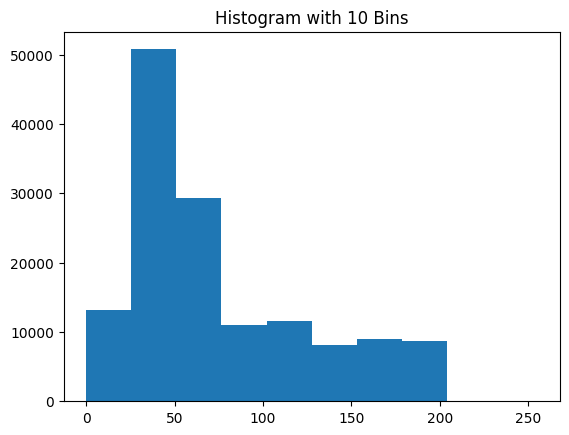

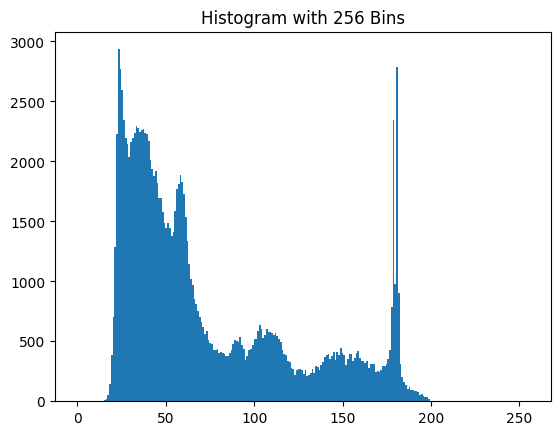

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (P from previous steps)
P = cv2.imread('mrt-train.jpg', cv2.IMREAD_GRAYSCALE)

# Part a: Display the histogram with 10 bins
plt.figure()
plt.hist(P.ravel(), bins=10, range=[0, 255])
plt.title('Histogram with 10 Bins')
plt.show()

# Display the histogram with 256 bins
plt.figure()
plt.hist(P.ravel(), bins=256, range=[0, 255])
plt.title('Histogram with 256 Bins')
plt.show()


What are the differences between the histograms with 10 bins and 256 bins?


The histogram with 10 bins is more generalized and easier to interpret for quick analysis but loses details.
The histogram with 256 bins shows a more precise distribution of pixel intensities.

#### Part b: Perform Histogram Equalization

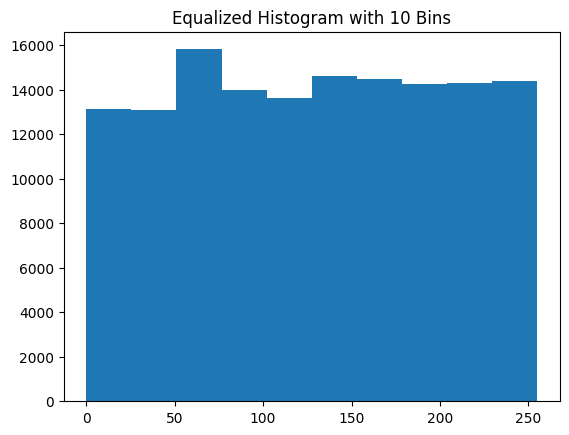

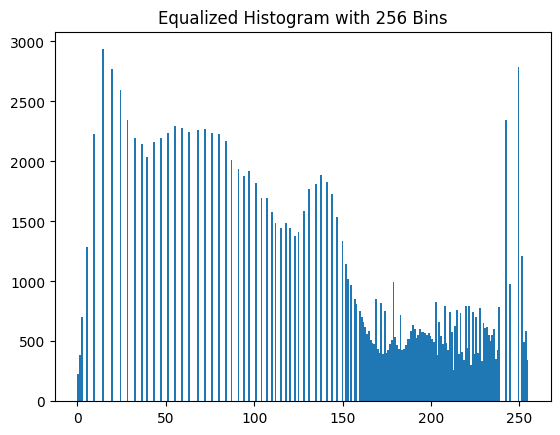

In [31]:
# Part b: Perform histogram equalization
P3 = cv2.equalizeHist(P)

# Display the histograms for the equalized image with 10 and 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=10, range=[0, 255])
plt.title('Equalized Histogram with 10 Bins')
plt.show()

plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Equalized Histogram with 256 Bins')
plt.show()


Are the histograms equalized? What are the similarities and differences between the histograms?

Yes, the equalized histograms should show a more even distribution of pixel intensities compared to the original. The pixel intensities are stretched to use the full range (0-255).

10 Bins vs. 256 Bins: With 256 bins, the intensity values are more spread out after equalization. With 10 bins, the general distribution will look more uniform compared to the original.

#### Part c: Rerun the Histogram Equalization on P3

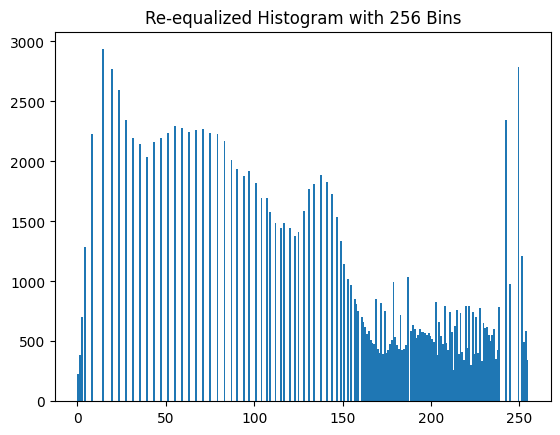

In [32]:
# Part c: Rerun histogram equalization on the already equalized image
P3 = cv2.equalizeHist(P3)

# Display the histogram for the re-equalized image with 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Re-equalized Histogram with 256 Bins')
plt.show()

Question: Does the histogram become more uniform? Why?

When histogram equalization is applied again to the equalized image (P3), the pixel values remain unchanged because they have already been redistributed. Since the CDF remains the same, reapplying the process has no further effect. The histogram does not become more uniform because the intensities are already spread as much as possible. Thus, the result remains the same after re-equalization.

### 2.3 Linear Spatial Filtering

#### Part a: Generate Gaussian Filters and Normalize

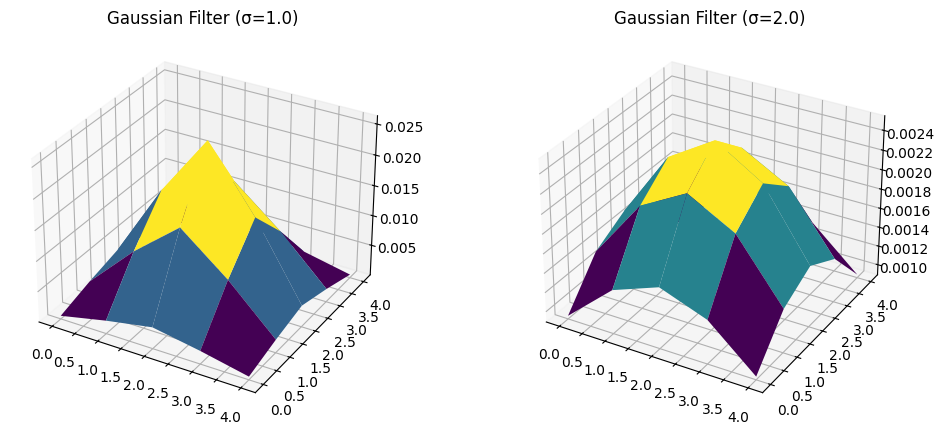

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a Gaussian filter
def gaussian_filter(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    gauss = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    return gauss / (2 * np.pi * sigma**2 * np.sum(gauss))  # Normalize to sum to 1

# Generate the filters
filter_1 = gaussian_filter(5, 1.0)
filter_2 = gaussian_filter(5, 2.0)

# Plotting the filters as 3D surface plots
fig = plt.figure(figsize=(12, 5))

# Filter with sigma=1.0
ax1 = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(range(5), range(5))
ax1.plot_surface(x, y, filter_1, cmap='viridis')
ax1.set_title('Gaussian Filter (σ=1.0)')

# Filter with sigma=2.0
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, filter_2, cmap='viridis')
ax2.set_title('Gaussian Filter (σ=2.0)')

plt.show()


#### Part b: Load Image with Gaussian Noise

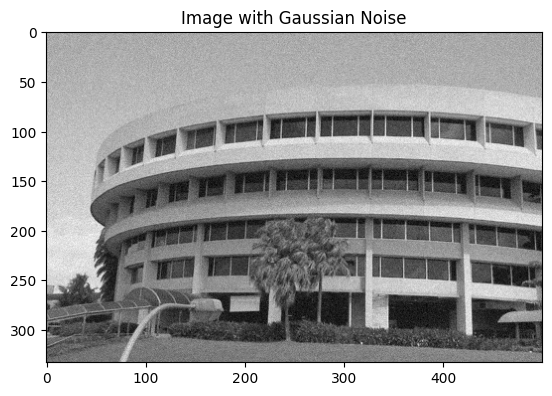

In [34]:
import cv2

# Load the noisy image
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_gaussian_noise, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.show()

#### Part c: Filter the Image Using the Gaussian Filters

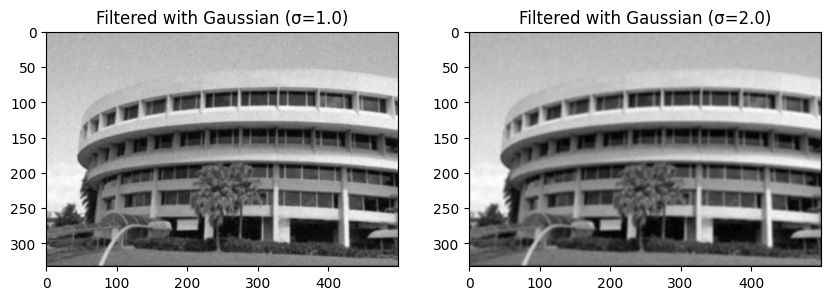

In [35]:
from scipy.signal import convolve2d

# Apply the Gaussian filters using convolution
filtered_image_1 = convolve2d(image_gaussian_noise, filter_1, mode='same')
filtered_image_2 = convolve2d(image_gaussian_noise, filter_2, mode='same')

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_1, cmap='gray')
plt.title('Filtered with Gaussian (σ=1.0)')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_2, cmap='gray')
plt.title('Filtered with Gaussian (σ=2.0)')

plt.show()

Filter Effectiveness:

- σ=1.0: Provides mild smoothing, reducing some Gaussian noise while preserving details and edges. Effective when detail retention is prioritized over complete noise removal.

- σ=2.0: Applies stronger smoothing, significantly reducing noise but blurring edges and fine details. Suitable for scenarios where noise reduction is more important than detail preservation.

Trade-offs:

- Detail Preservation vs. Noise Reduction: 
  - σ=1.0 maintains sharpness, useful for clarity and texture preservation.
  - σ=2.0 offers better noise reduction but sacrifices sharpness, leading to a blurred appearance.

- Impact of Not Filtering:
  - Without filtering, Gaussian noise remains, making the image grainy and reducing visibility.
  - Filtering improves visibility, with a trade-off between sharpness and smoothness.

In summary, σ=1.0 balances noise reduction and detail preservation, while σ=2.0 emphasizes noise reduction at the expense of image sharpness. The choice depends on whether the focus is on retaining details or achieving stronger noise reduction.


#### Part d: Load Image with Speckle Noise

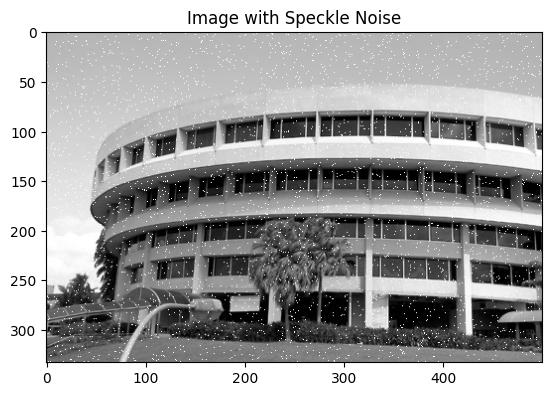

In [36]:
# Load the image with speckle noise
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_speckle_noise, cmap='gray')
plt.title('Image with Speckle Noise')
plt.show()

#### Part e: Apply Filters to Image with Speckle Noise

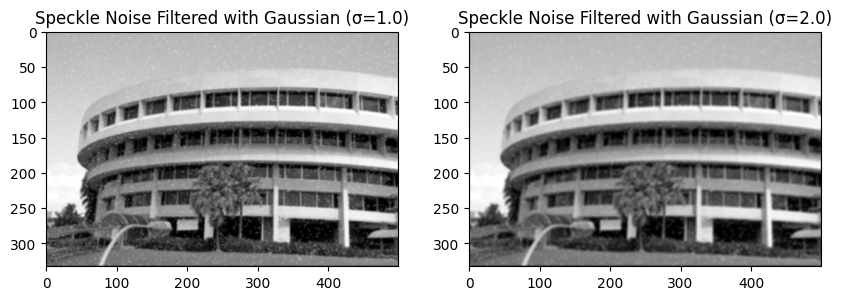

In [37]:
# Apply the Gaussian filters using convolution on the speckle noise image
filtered_speckle_1 = convolve2d(image_speckle_noise, filter_1, mode='same')
filtered_speckle_2 = convolve2d(image_speckle_noise, filter_2, mode='same')

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_speckle_1, cmap='gray')
plt.title('Speckle Noise Filtered with Gaussian (σ=1.0)')

plt.subplot(1, 2, 2)
plt.imshow(filtered_speckle_2, cmap='gray')
plt.title('Speckle Noise Filtered with Gaussian (σ=2.0)')

plt.show()

Filter Effectiveness on Speckle Noise:

- σ=1.0: Provides a mild smoothing effect, reducing some speckle noise but preserving details and edges. Less effective at removing speckle noise, as this type of noise is not as effectively handled by Gaussian filters.

- σ=2.0: Applies stronger smoothing, which reduces more speckle noise but also blurs fine details and edges. Offers better noise reduction but is still not ideal for speckle noise, as Gaussian filters are designed more for Gaussian noise.

Trade-offs:

- Detail Preservation vs. Noise Reduction:
  - σ=1.0 retains more image details, making it preferable when preserving texture and edges is important.
  - σ=2.0 reduces more noise but causes more blurring, which can obscure details.

- Effectiveness on Speckle Noise:
  - Gaussian filters are generally less effective on speckle noise compared to Gaussian noise.
  - Median filtering would typically perform better on speckle noise by targeting outlier values.

In summary, while σ=1.0 maintains more detail, σ=2.0 offers slightly better noise reduction. However, Gaussian filters are not optimal for speckle noise, and alternatives like median filtering would be more effective in handling this type of noise.


### 2.4 Median Filtering

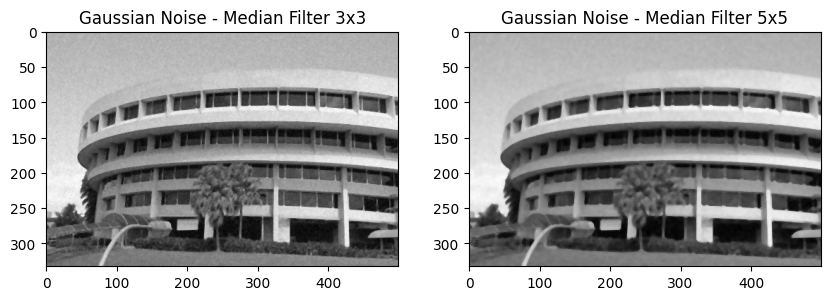

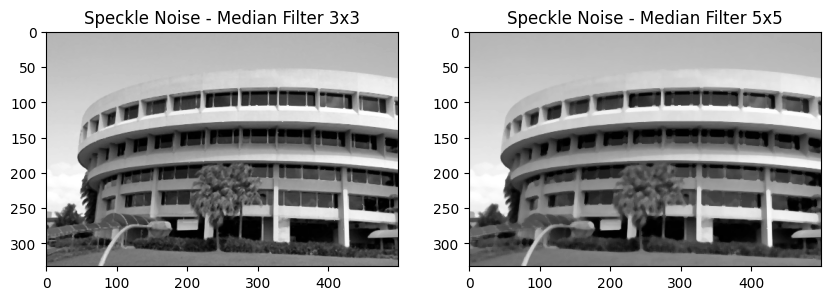

In [40]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load the images with Gaussian and Speckle noise
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filtering on Gaussian noise image with 3x3 and 5x5 filters
median_gaussian_3x3 = median_filter(image_gaussian_noise, size=3)
median_gaussian_5x5 = median_filter(image_gaussian_noise, size=5)

# Apply median filtering on Speckle noise image with 3x3 and 5x5 filters
median_speckle_3x3 = median_filter(image_speckle_noise, size=3)
median_speckle_5x5 = median_filter(image_speckle_noise, size=5)

# Display results for Gaussian noise image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(median_gaussian_3x3, cmap='gray')
plt.title('Gaussian Noise - Median Filter 3x3')

plt.subplot(1, 2, 2)
plt.imshow(median_gaussian_5x5, cmap='gray')
plt.title('Gaussian Noise - Median Filter 5x5')
plt.show()

# Display results for Speckle noise image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(median_speckle_3x3, cmap='gray')
plt.title('Speckle Noise - Median Filter 3x3')

plt.subplot(1, 2, 2)
plt.imshow(median_speckle_5x5, cmap='gray')
plt.title('Speckle Noise - Median Filter 5x5')
plt.show()


Comparison with Gaussian Filtering:

- Gaussian Noise:
  - Median filters are less effective, as they target isolated noise, not continuous noise like Gaussian noise.
  - Gaussian filters are better suited for Gaussian noise due to their averaging effect.

- Speckle Noise:
  - Median filters effectively reduce speckle noise by targeting high-intensity, isolated pixels, preserving edges better than Gaussian filters.

Trade-offs:

- Median Filtering:
  - Pros: Excellent for speckle and salt-and-pepper noise, preserves edges.
  - Cons: Less effective on Gaussian noise; larger sizes may blur details.

- Gaussian Filtering:
  - Pros: Good for Gaussian noise, provides smooth transitions.
  - Cons: Blurs edges, less effective on speckle and salt-and-pepper noise.

Summary: Median filters are ideal for speckle noise, especially with larger neighborhood sizes, while Gaussian filters are best for Gaussian noise. Choose median filters for isolated noise and Gaussian filters for continuous noise.


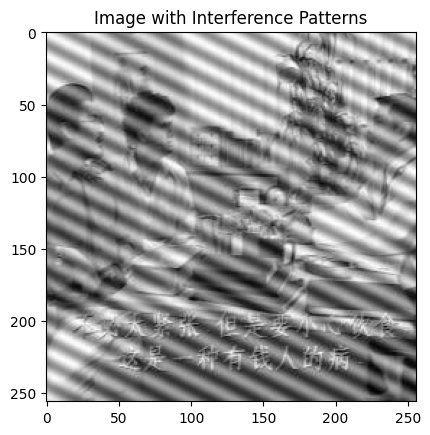

In [42]:
import cv2
import matplotlib.pyplot as plt

# Load and display the image with interference patterns
image = cv2.imread('pck-int.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Image with Interference Patterns')
plt.show()


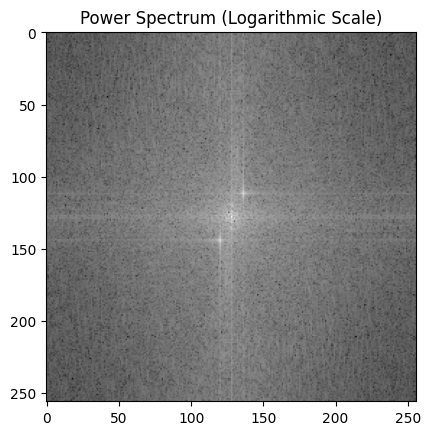

In [45]:
import numpy as np

# Step 1: Fourier Transform
F = np.fft.fft2(image)

# Step 2: Compute the Power Spectrum
S = np.abs(F)**2

# Step 3: Shift the Fourier spectrum to center
S_shifted = np.fft.fftshift(S)

# Display the power spectrum (nonlinearly scaled for better visualization)
plt.imshow(np.log(S_shifted + 1), cmap='grey')
plt.title('Power Spectrum (Logarithmic Scale)')
plt.show()
